Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки</font>
* Очень интересная и полезная статья: https://dyakonov.org/2021/05/27/imbalance/

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, видно, что приложено много усилий.
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
- Тебе удалось справиться с задачей дисбаланса классов, поздравляю!
- Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,precision_recall_curve ,f1_score, roc_auc_score,roc_curve
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>

Открываем файл с данными и изучаем общую информацию

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Как мы видим присутствуют пустые значения по полю "Tenure"

In [4]:
df.duplicated().sum()

0

In [5]:
df[['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].corr()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
CustomerId,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.015271
CreditScore,0.005308,1.000000,-0.003965,-0.000062,0.006268,-0.001384
Age,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.007201
Tenure,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.010520
Balance,-0.012419,0.006268,0.028308,-0.007911,1.000000,0.012797
EstimatedSalary,0.015271,-0.001384,-0.007201,0.010520,0.012797,1.000000


Удаленим ненужные столбцы

In [6]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение.
</div>


Т.к. ранее мы увидели, что есть пустые значения, то заполним их медианным значением.

In [7]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median()).astype('int64')

<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски обработаны хорошим образом
</div>


Закодируем категориальные признаки, чтобы не попасть в дамми-ловушку, применим аргумент drop_first функции pd.get_dummies()

In [8]:
df_ohe = pd.get_dummies(df, drop_first=True)

<div class="alert alert-block alert-success">
<b>Успех:</b>  OHE - хороший выбор. Но советую в будущем обратить внимание на инструмент OneHotEncoder от sklearn
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>

В нашем случае, нет отдельного файла с тестовой,тренировочной и валидной выборкой, поэтому мы их будем создавать сами. Поделим cначала на обучающую и промежуточную, а потом промежуточную поделим на валидную и тестовую.

In [9]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

In [10]:
features_train, features_inter, target_train, target_inter = train_test_split(
    features.copy(), 
    target.copy(), 
    test_size=0.4, 
    random_state=12345)

Теперь промежуточную поделим пополам

In [11]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_inter.copy(),
    target_inter.copy(),
    test_size=0.5,
    random_state=12345)

Проверим размерности

In [12]:
features_train.shape

(6000, 11)

In [13]:
features_valid.shape

(2000, 11)

Стандартизируем численные признаки при помощи StandardScaler

In [14]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]  = scaler.transform(features_valid[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler обучен только на трейне
</div>


Вывод: данные подготовлены для исследования и разбиты на выборки.

## Исследование задачи

Проверим, как часто в целевом признаке нашего исходного датасета встречается класс «1» или «0»:

In [15]:
df_ohe['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

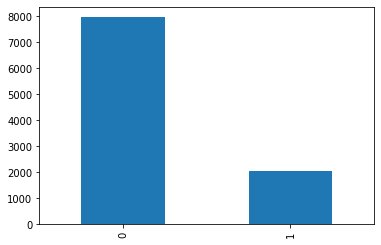

In [16]:
df_ohe['Exited'].value_counts().plot(kind='bar')
plt.show()

Как мы видим порядка 80 процентов данных по пользователям оставшимся, и только 20 ушедших. 

<div class="alert alert-block alert-success">
<b>Успех:</b> дисбаланс обнаружен
</div>

Перед нами стоит задача на классификацию.
Протестируем на разных моделях.

Дерево решений

In [17]:
model_dt = DecisionTreeClassifier(random_state=12345) 
model_dt.fit(features_train,target_train) 
predictions_valid_dt = model_dt.predict(features_valid) 
accuracy_score(target_valid, predictions_valid_dt)

0.7935

Случайный лес в регрессии

In [18]:
model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(features_train, target_train) 
predictions_valid_rf = model_rf.predict(features_valid)
accuracy_score(target_valid, predictions_valid_rf) 

0.8585

Логистическая регрессия

In [19]:
model_lr = LogisticRegression(random_state=12345) 
model_lr.fit(features_train, target_train) 
model_lr.score(features_valid, target_valid)

0.802


Матрица ошибок, плотность, точность, F1 score, roc_auc

Лучшее значение accuracy мы получили на модели случайного леса в регрессии, рассчитаем необходимые величины для неё.

Рассчитаем матрицу решений

In [20]:
confusion_matrix(target_valid, predictions_valid_rf)

array([[1524,   58],
       [ 225,  193]])

Рассчитаем плотность и точность

In [21]:
display(recall_score(target_valid, predictions_valid_rf))
display(precision_score(target_valid, predictions_valid_rf))

0.46172248803827753

0.7689243027888446

Посмотрим на точность и полноту

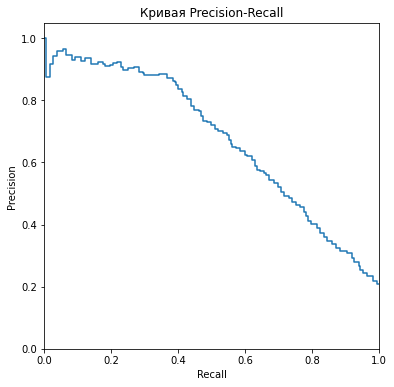

In [22]:
model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(features_train, target_train) 
probabilities_valid_rf = model_rf.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid_rf[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Вычислим F1-меру

In [23]:
f1_score(target_valid, predictions_valid_rf)

0.5769805680119582

Посмотрим на долю ложноположительных ответов (FPR)и долю истинно положительных ответов (TPR)  на графике (кривой-ошибок).

In [24]:
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
auc_roc

0.8406361337777266

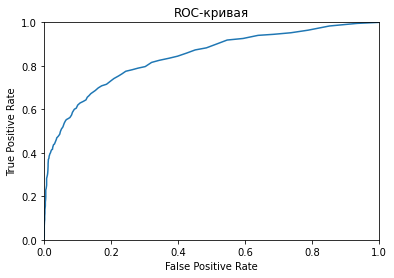

In [25]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.color='indigo',
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Рассмотрев распределение по признаку мы увидели дисбаланс в данных

Вывод:
Ранее мы выявили что лучший результат показывает модель случайного леса, для неё мы решили рассчитать матрицу ошибок, плотность, точность и в завершение построить кривую ошибок.
Построив матрицу ошибок мы получили общее предсавление по неточностям нашей модели.
Перейдя к полноте и точности мы можем утверждать, что полнота в нашей модели достаточно слабая - а это означает,что модель плохо ищет положительные объекты, причём точность находится на достаточно хорошем уровне.

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан хорошо, радует что уделено внимание метрикам полноты и точности - они ценны для бизнеса, идем дальше.
</div>



## Борьба с дисбалансом

Для борьбы с дисбалансом мы будем использовать три способа - взвешевание классов, уменьшение(в части положительных) и увеличение(в части отрицательных) выборки.

Взвешивание классов:

Дерево решений в регрессии

In [26]:
model_dt = DecisionTreeClassifier(random_state=12345) 
model_dt.fit(features_train,target_train) 
predictions_valid_dt = model_dt.predict(features_valid) 

print('F1:',f1_score(target_valid, predictions_valid_dt))
probabilities_valid_dt = model_dt.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_dt))

F1: 0.5006045949214026
ROC_AUC 0.6837644190927842


In [27]:
model_dt = DecisionTreeClassifier(random_state=12345,  class_weight='balanced') 
model_dt.fit(features_train,target_train) 
predictions_valid_dt = model_dt.predict(features_valid) 

print('F1:',f1_score(target_valid, predictions_valid_dt))
probabilities_valid_dt = model_dt.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_dt))

F1: 0.47469879518072294
ROC_AUC 0.6676939734694742


Случайный лес в регрессии

In [28]:
model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(features_train, target_train)
predictions_valid_rf = model_rf.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_rf))
probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_rf))

F1: 0.5769805680119582
ROC_AUC 0.8406361337777266


In [29]:
model_rf = RandomForestClassifier(random_state=12345,  class_weight='balanced')
model_rf.fit(features_train, target_train)
predictions_valid_rf = model_rf.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_rf))
probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_rf))

F1: 0.5648148148148148
ROC_AUC 0.8393847652115003


Логистическая регрессия

In [30]:
model_lr = LogisticRegression(random_state=12345) 
model_lr.fit(features_train, target_train) 
predictions_valid_lr = model_lr.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_lr))
probabilities_valid_lr = model_lr.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_lr))

F1: 0.33108108108108103
ROC_AUC 0.7588057029137607


In [31]:
model_lr = LogisticRegression(random_state=12345,  class_weight='balanced') 
model_lr.fit(features_train, target_train) 
predictions_valid_lr = model_lr.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_lr))
probabilities_valid_lr = model_lr.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_lr))

F1: 0.4888507718696398
ROC_AUC 0.7636750766699532


Увеличение выборки

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    return shuffle(features_upsampled,target_upsampled, random_state=12345)
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
features_upsampled.shape

(9588, 11)



<div class="alert alert-block alert-success">
    
<b>Успех:</b> Выбран правильный `repeat`
</div>

In [33]:
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

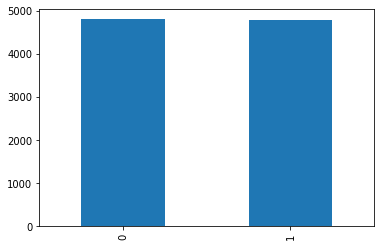

In [34]:
target_upsampled.value_counts().plot(kind='bar')
plt.show()

Соотношение улучшилось.

Проверим на моделях.

Дерево решений в регрессии

In [35]:
model_dt = DecisionTreeClassifier(random_state=12345,  class_weight='balanced') 
model_dt.fit(features_upsampled,target_upsampled) 
predictions_valid_dt = model_dt.predict(features_valid) 

print('F1:',f1_score(target_valid, predictions_valid_dt))
probabilities_valid_dt = model_dt.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_dt))

F1: 0.47381546134663344
ROC_AUC 0.6659579358694403


Случайный лес в регрессии

In [36]:
model_rf = RandomForestClassifier(random_state=12345,  class_weight='balanced')
model_rf.fit(features_upsampled, target_upsampled)
predictions_valid_rf = model_rf.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_rf))
probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_rf))

F1: 0.6050198150594451
ROC_AUC 0.8422436320084201


Логистическая регрессия

In [37]:
model_lr = LogisticRegression(random_state=12345,  class_weight='balanced') 
model_lr.fit(features_upsampled, target_upsampled) 
predictions_valid_lr = model_lr.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_lr))
probabilities_valid_lr = model_lr.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_lr))

F1: 0.4888507718696398
ROC_AUC 0.7636312220615901


Уменьшение выборки

In [38]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
  
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Не лучший `fraction`. 0.25 было бы поточнее
</div>


In [39]:
target_downsampled.value_counts()

0    1922
1    1196
Name: Exited, dtype: int64

In [40]:
features_downsampled.shape

(3118, 11)

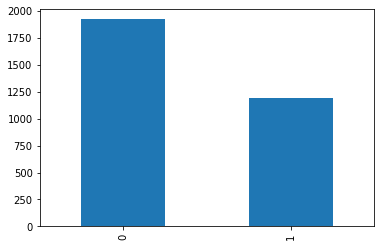

In [41]:
target_downsampled.value_counts().plot(kind='bar')
plt.show()

Соотношение уже лучше чем в изначальной выборке

Дерево решений в регрессии

In [42]:
model_dt = DecisionTreeClassifier(random_state=12345,  class_weight='balanced') 
model_dt.fit(features_downsampled,target_downsampled) 
predictions_valid_dt = model_dt.predict(features_valid) 

print('F1:',f1_score(target_valid, predictions_valid_dt))
probabilities_valid_dt = model_dt.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_dt))

F1: 0.48349514563106805
ROC_AUC 0.6831186977903325


Случайный лес в регрессии

In [43]:
model_rf = RandomForestClassifier(random_state=12345,  class_weight='balanced')
model_rf.fit(features_downsampled, target_downsampled)
predictions_valid_rf = model_rf.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_rf))
probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_rf))

F1: 0.6143344709897611
ROC_AUC 0.8413937599428982


Логистическая регрессия

In [44]:
model_lr = LogisticRegression(random_state=12345,  class_weight='balanced') 
model_lr.fit(features_downsampled, target_downsampled) 
predictions_valid_lr = model_lr.predict(features_valid)

print('F1:',f1_score(target_valid, predictions_valid_lr))
probabilities_valid_lr = model_lr.predict_proba(features_valid)[:, 1]
print("ROC_AUC", roc_auc_score(target_valid, probabilities_valid_lr))

F1: 0.4918314703353396
ROC_AUC 0.7640818659682189


Вывод: В результате мы получили, что у случайого леса показатели самые лучшие по сравнению с другими f1 0.61 пртив 0.48 и 0.49 и roc_auc 0.83 против 0.68 и 0.76 и в целом по всем моделям лучшие показатели получились при уменьшении выборки.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошая работа с моделями машинного обучения.  Радует  достатчоное количество расмотренных методов для борьбы с дисбалансом.
</div>


## Тестирование модели

Модель с лучшими показателями была случайный лес

In [45]:
model_rf = RandomForestClassifier(random_state=12345,  class_weight='balanced')
model_rf.fit(features_downsampled, target_downsampled)
predictions_valid_rf = model_rf.predict(features_test)

print('F1:',f1_score(target_test, predictions_valid_rf))
probabilities_valid_rf = model_rf.predict_proba(features_test)[:, 1]
print("ROC_AUC", roc_auc_score(target_test, probabilities_valid_rf))

F1: 0.5952649379932355
ROC_AUC 0.8468468873628144


Вывод: построена модель с предельно большим значением F1-меры (среднегармоническое полноты и точности).

<div class="alert alert-block alert-success">
<b>Успех:</b>  С тестированием все в порядке! Тебе удалось достичь хороших показателей метрик на тесте. 
</div> 





<div class="alert alert-block alert-info">
<b>Совет:</b> Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br> Очень ВАЖНАЯ для аналитики штука. Ведь нам не просто модель с метрикой нужна, а ещё и причины понять высокой/низкой метрики. Т.е. понять с какой силой сами факторы влияют на целевую.
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [X]  Jupyter Notebook открыт
- [X]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке исполнения
- [X]  Выполнен шаг 1: данные подготовлены
- [X]  Выполнен шаг 2: задача исследована
    - [X]  Исследован баланс классов
    - [X]  Изучены модели без учёта дисбаланса
    - [X]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 3: учтён дисбаланс
    - [X]  Применено несколько способов борьбы с дисбалансом
    - [X]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 4: проведено тестирование
- [X]  Удалось достичь *F1*-меры не менее 0.59
- [X]  Исследована метрика *AUC-ROC*